    Ejercicio: conjunto de datos del Titanic: busque y visualice los datos que faltan
Los conjuntos de datos a menudo pueden tener datos faltantes, lo que puede causar problemas cuando realizamos aprendizaje automático. Los datos que faltan pueden ser difíciles de detectar a primera vista.

En nuestro escenario, obtuvimos una lista de pasajeros en el fallido viaje inaugural del Titanic. Nos gustaría saber qué factores predijeron la supervivencia de los pasajeros. Para nuestra primera tarea, que realizaremos aquí, verificaremos si falta información en nuestro conjunto de datos.

In [ ]:
# pip install graphing

    Preparando datos
Usemos Pandas para cargar el conjunto de datos y echarle un vistazo rápido:

In [2]:
import pandas as pd
#pip install missingno

# cargar los datos a un dataframe de pandas
dataset = pd.read_csv('C:/Users/santi/OneDrive/Escritorio/Desktop/titanic.csv',index_col=False, sep=",", header=0)

# Let's take a look at the data
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Ahora, veremos cuántas muestras y columnas tenemos:

In [3]:
# Shape tells us how many rows and columns we have
print(dataset.shape)

(891, 12)



Tenemos datos de 891 pasajeros, cada uno descrito por 12 variables diferentes.

    Encontrar datos faltantes
¿Tenemos un conjunto de datos completo?

No. Sabemos por la historia que había más de 2000 personas en el Titanic, ¡así que sabemos de inmediato que nos falta información sobre más de 1000 personas!

¿Cómo podemos saber si los datos que tenemos disponibles están completos?

Podríamos imprimir todo el conjunto de datos, pero esto podría implicar un error humano y sería poco práctico con tantas muestras.

Una mejor opción sería pandas informar las columnas que tienen celdas "vacías":

In [5]:
# Calcular el número de celdas vacías en cada columna 
# La siguiente línea consta de tres comandos. Intentar 
# pensar en cómo trabajan juntos para calcular 
# el número de entradas faltantes por columna
missing_data = dataset.isnull().sum().to_frame()

# Cambiar el nombre de la columna que contiene las sumas
missing_data = missing_data.rename(columns={0:'celdas vacias'})

# Imprime los resultados
print(missing_data)

             celdas vacias
PassengerId              0
Survived                 0
Pclass                   0
Name                     0
Sex                      0
Age                    177
SibSp                    0
Parch                    0
Ticket                   0
Fare                     0
Cabin                  687
Embarked                 2


Parece que no sabemos la edad de 177 pasajeros, y no sabemos si dos de ellos siquiera embarcaron.

También falta la información de la cabina para la friolera de 687 personas.

    Visualizaciones de datos faltantes
A veces puede ayudar si podemos ver si los datos que faltan forman algún tipo de patrón.

Podemos trazar la ausencia de datos de varias maneras. Uno de los más útiles es trazar literalmente las lagunas en el conjunto de datos:

<Axes: >

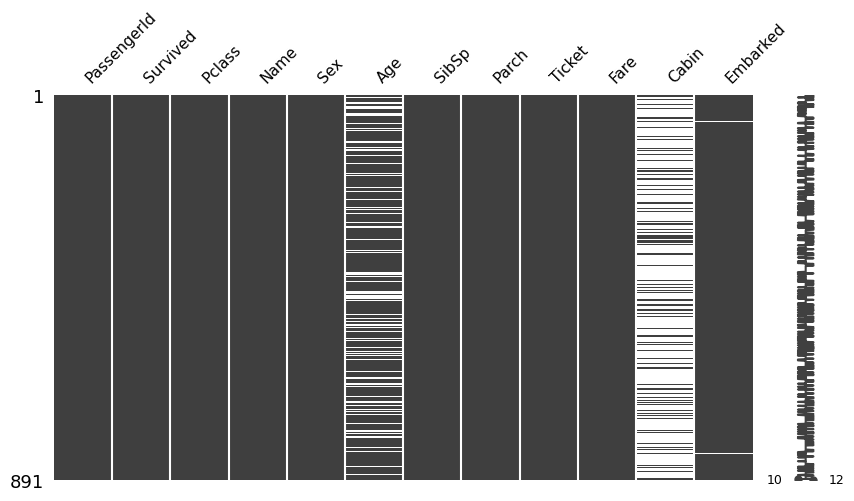

In [6]:
# importar paquete missingno
import missingno as msno

# Trace un gráfico de matriz, establezca el gráfico y el tamaño de fuente
msno.matrix(dataset, figsize=(10,5), fontsize=11)

Las barras blancas en el gráfico muestran datos faltantes. Aquí, los patrones no son visualmente claros, pero tal vez a muchos pasajeros a los que les falta Age información también les falte Cabin información.

    Identificación de pasajeros individuales con información faltante.
Usemos pandas para obtener una lista de pasajeros de edad desconocida:

In [7]:
# Seleccione Pasajeros con edad desconocida 
# Observe cómo usamos filas .isnull() sin valor
unknown_age = dataset[dataset["Age"].isnull()]

# Imprime solo las columnas que queremos por el momento (para que se ajuste mejor a la pantalla) 
# limitar la salida a 20 filas
unknown_age[["PassengerId","Name", "Survived", "Age"]][:20]

,PassengerId,Name,Survived,Age
5,6,"Moran, Mr. James",0,NaN
17,18,"Williams, Mr. Charles Eugene",1,NaN
19,20,"Masselmani, Mrs. Fatima",1,NaN
26,27,"Emir, Mr. Farred Chehab",0,NaN
28,29,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN
29,30,"Todoroff, Mr. Lalio",0,NaN
31,32,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN
32,33,"Glynn, Miss. Mary Agatha",1,NaN
36,37,"Mamee, Mr. Hanna",1,NaN
42,43,"Kraeff, Mr. Theodor",0,NaN



Esta técnica enumera a los pasajeros con información faltante Cabin o Embarked también. Combinemos esto usando un AND, para ver a cuántos pasajeros les falta información sobre la cabina y la edad.

In [9]:
# Encuentre a aquellos pasajeros a los que les falte información sobre la edad o la cabina
missing_age = dataset["Age"].isnull()
missing_cabin = dataset["Cabin"].isnull()

# Encuentra a los pasajeros que faltan ambos
unknown_age_and_cabin = dataset[missing_age & missing_cabin]
print("Número de pasajeros que faltan información sobre la edad y la cabina:", len(unknown_age_and_cabin))

Número de pasajeros que faltan información sobre la edad y la cabina: 158


Nuestras sospechas eran correctas: a la mayoría de los pasajeros les falta información sobre la edad y también les falta información sobre la cabina.

Normalmente, desde aquí, querríamos saber por qué tenemos este problema. Una buena hipótesis es que la información no se recolectó con el cuidado suficiente para los pasajeros que usaron los boletos baratos.

Tracemos un histograma de clases de boletos y otro de personas a las que les falta información.

In [10]:
import graphing

# La biblioteca 'graphing' es un código personalizado que usamos para hacer gráficos 
# rápidamente. Si no ejecuta este cuaderno en la zona de pruebas 
# entorno, es posible que deba instalar formalmente esta biblioteca 
# en el entorno que utiliza. Ver la primera celda de este cuaderno 
# para obtener más información sobre la instalación de la 'graficación' 
# biblioteca. 

graphing.histogram(dataset, 'Pclass', title='Ticket Class (All Passengers)', show=True)
graphing.histogram(unknown_age_and_cabin, 'Pclass', title='Ticket Class (Passengers Missing Cabin and Age Information)')


Parece que aquellos pasajeros a los que les faltaba información solían utilizar los billetes más baratos. Este tipo de sesgos pueden causar problemas en los análisis del mundo real.

    Falta como cero
Además, algunos conjuntos de datos pueden tener valores faltantes que aparecen como cero. Si bien el conjunto de datos del Titanic no tiene este problema, veamos cómo funcionaría aquí.

In [12]:
import numpy as np

# Imprime la edad promedio de los pasajeros de los que tenemos datos de edad
mean_age = np.mean(dataset.Age)
print("La edad promedio en el barco era", mean_age, "años de edad")

# Ahora, haz otro modelo donde las edades faltantes contengan un '0'
dataset['Age_2'] = dataset['Age'].fillna(0)
mean_age = np.mean(dataset.Age_2)
print("La edad promedio en el barco era", mean_age, "años de edad")

La edad promedio en el barco era 29.69911764705882 años de edad
La edad promedio en el barco era 23.79929292929293 años de edad


¿Que pasó aquí? Nuestros análisis han considerado que los valores de 0 no son 'faltantes' sino edades reales.

Esto muestra que puede ser importante programar la revisión de sus datos sin procesar antes de ejecutar los análisis. Otra forma rápida de tener una idea de un conjunto de datos es graficar su distribución:

In [13]:
graphing.histogram(dataset, label_x="Age_2")


Aquí, vemos un número improbable de niños muy pequeños. Esto sería motivo para una mayor inspección de los datos, con la esperanza de detectar el hecho de que las edades que faltan aparecen como ceros.

    Manejo de datos faltantes
Hay muchas formas de abordar los datos faltantes, cada una con ventajas y desventajas.

Echemos un vistazo a las opciones menos complejas:

    Opción 1: eliminar datos con filas faltantes
Cuando tenemos un modelo que no puede manejar los datos que faltan, lo más prudente es eliminar las filas a las que les falta información.

Eliminemos algunos datos de la Embarked columna, que solo tiene dos filas con datos faltantes.

In [15]:
# Cree un conjunto de datos "limpio", donde corrijamos acumulativamente los valores faltantes 
# Comience eliminando filas SOLO donde "Embarcado" no tiene valores
print(f"El tamaño original de nuestro conjunto de datos era", dataset.shape)
clean_dataset = dataset.dropna(subset=["Embarked"])
clean_dataset = clean_dataset.reindex()

# ¿Cuántas filas tenemos ahora?
print("La forma para el conjunto de datos limpio es", clean_dataset.shape)

El tamaño original de nuestro conjunto de datos era (891, 13)
La forma para el conjunto de datos limpio es (889, 13)


Podemos ver que esto eliminó las dos filas ofensivas de nuestro nuevo conjunto de datos limpio.

    Opción 2: Reemplace los valores vacíos con la media o la mediana de esos datos.
A veces, nuestro modelo no puede manejar los valores faltantes y tampoco podemos darnos el lujo de eliminar demasiados datos. En este caso, a veces podemos completar los datos faltantes con un promedio calculado sobre la base del resto del conjunto de datos. Tenga en cuenta que la imputación de datos como estos puede afectar negativamente al rendimiento del modelo. Por lo general, es mejor simplemente eliminar los datos que faltan o usar un modelo diseñado para manejar los valores que faltan.

A continuación, imputamos datos para el Age campo. Usamos la media Age de las filas restantes, dado que >80% de estas no están vacías:

In [17]:
# Calculate the mean value for the Age column
mean_age = clean_dataset["Age"].mean()

print("The mean age is", mean_age)

# Replace empty values in "Age" with the mean calculated above
clean_dataset["Age"].fillna(mean_age, inplace=True)

# Let's see what the clean dataset looks like now
print(clean_dataset.isnull().sum().to_frame().rename(columns={0:'Celdas vacias'}))

The mean age is 29.642092696629216
             Celdas vacias
PassengerId              0
Survived                 0
Pclass                   0
Name                     0
Sex                      0
Age                      0
SibSp                    0
Parch                    0
Ticket                   0
Fare                     0
Cabin                  687
Embarked                 0
Age_2                    0


El Age campo ya no tiene celdas vacías.

    Opción 3: Asignar una nueva categoría a datos categóricos desconocidos
El Cabincampo es un campo categórico, porque las cabinas del Titanic tienen un número finito de opciones posibles. Desafortunadamente, muchos registros no tienen cabina en la lista.

Para este ejercicio, tiene mucho sentido crear una Unknown categoría y asignarla a los casos en los que se desconoce la cabina:

In [19]:
# Assign unknown to records where "Cabin" is empty
clean_dataset["Cabin"].fillna("Unknown", inplace=True)

# Let's see what the clean dataset looks like now
print(clean_dataset.isnull().sum().to_frame().rename(columns={0:'Celdad vacias'}))

             Celdad vacias
PassengerId              0
Survived                 0
Pclass                   0
Name                     0
Sex                      0
Age                      0
SibSp                    0
Parch                    0
Ticket                   0
Fare                     0
Cabin                    0
Embarked                 0
Age_2                    0


¡Eso es todo! ¡No más datos perdidos!

Solo perdimos dos registros (donde Embarked estaba vacío).

Dicho esto, tuvimos que hacer algunas aproximaciones para llenar los espacios que faltaban para las columnas Age y Cabin, y eso sin duda influirá en el rendimiento de cualquier modelo que entrenemos con estos datos.

    Ejercicio: Titanic Dataset - Visualización de diferentes tipos de datos
Para construir mejores modelos de aprendizaje automático, debemos comprender los datos disponibles. Esto generalmente significa ambos:

Visualización de datos

entender el tipo de datos que tenemos disponibles

En este módulo, practicaremos la limpieza de nuestro conjunto de datos Titanic y la visualización de diferentes tipos de datos, especialmente

continuo
ordinal
categórico
columna de identidad simple
tipos de datos.

    Una nota sobre nuestra gráfica
En este ejercicio, usaremos un script de python personalizado para crear nuestros gráficos. Este script usa Plotly, una conocida biblioteca de gráficos.

Este script se centrará en la exploración de datos, en lugar de un enfoque profundo en Plotly. Si desea revisar este script personalizado, puede encontrarlo en nuestro repositorio de GitHub.

     Primera inspección
Recarguemos el Titanic Dataset y volvamos a familiarizarnos con sus datos:

In [20]:
import pandas as pd

# Load data from our dataset file into a pandas dataframe
dataset = pd.read_csv('C:/Users/santi/OneDrive/Escritorio/Desktop/titanic.csv',index_col=False, sep=",", header=0)

# Let's take a look at the data
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Observe detenidamente las columnas e intente identificar aquellas columnas que contienen datos continuos, ordinales, categóricos o de identidad.

Podemos mostrar un breve resumen de los tipos de datos con el info() método de panda:

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Podemos ver varias columnas almacenadas como datos numéricos (los tipos int64 o float64), mientras que otras contienen tipos de datos más complejos (los que tienen object como tipo D)

     Visualización de datos ordinales
Visualicemos algunos datos ordinales. Tenemos disponible:

Pclass- la clase de billete

Parch- el número de padres o hijos en el barco

sibsp- el número de hermanos o cónyuges en el barco

Podemos ver datos ordinales con casi cualquier tipo de gráfico. Comenzaremos con un histograma simple que describe las relaciones entre la clase de boleto y la probabilidad de supervivencia.

In [22]:
import graphing

graphing.histogram(dataset, label_x='Pclass', label_y='Survived', histfunc='avg', include_boxplot=True)


El diagrama de caja y bigotes (arriba) muestra que al menos la mitad de las personas tenían boletos de tercera clase; observe cómo la mediana y el máximo del diagrama se ubican en Pclass = 3.

El histograma muestra que las personas de segunda y tercera clase tendían a no sobrevivir al accidente.

Veamos cómo varía la supervivencia, dependiendo de si un pasajero tenía padres o hijos en el barco.

In [23]:
graphing.multiple_histogram(dataset, 
                            label_x='Pclass', # group by ticket class
                            label_group="Parch", # colour by no parents or children
                            label_y='Survived', 
                            histfunc="avg")

Para los titulares de boletos de primera y segunda clase, las personas en grupos familiares más grandes parecen haber tenido mejores tasas de supervivencia. Sin embargo, este no parece ser el caso de los pasajeros de tercera clase.

 Por último, veamos si aquellos con diferentes tipos de boletos tienden a estar en familias de diferentes tamaños. Para el análisis de distribución de datos, una caja y bigotes es una buena alternativa a los histogramas.

In [24]:
graphing.box_and_whisker(dataset, label_x="Pclass", label_y="SibSp")

La mayoría de los valores son cero. Esto demuestra que la mayoría de las personas viajaban sin hermanos y sin pareja. No hay diferencias obvias en este valor entre las diferentes clases de billetes.

    Visualización de datos continuos 
Los datos continuos generalmente se ven mejor usando: 

Un gráfico de dispersión XY, especialmente para las relaciones entre dos entidades continuas 

Histogramas o diagramas de caja y bigotes, para observar la dispersión de datos 

Nuestro conjunto de datos tiene Edad y Tarifa como columnas de datos continuos. Veámoslos:

In [25]:
graphing.scatter_2D(dataset, label_x="Age", label_y="Fare")

No vemos una relación obvia entre Edad y Tarifa. ¿El costo de un pasaje, o la edad de la persona, tiene alguna relación con la probabilidad de supervivencia?

In [26]:
# Plot Fare vs Survival
graphing.histogram(dataset, label_x="Fare", label_y="Survived", histfunc="avg", nbins=30, title="Fare vs Survival", include_boxplot=True, show=True)

# Plot Age vs Survival
graphing.histogram(dataset, label_x="Age", label_y="Survived", histfunc="avg", title="Age vs Survival", nbins=30, include_boxplot=True)

El diagrama de caja (arriba) de la primera figura nos muestra que la mayoría de las personas tenían boletos que costaban menos de £25, y el histograma nos muestra que las personas con boletos más caros tendían a sobrevivir. 

Nuestra segunda cifra indica que los pasajeros tenían un promedio de 30 años y que la mayoría de los niños menores de 10 años sobrevivieron, a diferencia de la mayoría de los adultos.

    Visualización de datos categóricos 
Nuestro conjunto de datos Titanic tiene las siguientes columnas categóricas: 

Sex (Male, Female)

Embarked - the port of ambarkation (C, Q, or S)

Cabin (many options)

Survival (0 = no, 1 = yes)

Los datos categóricos suelen verse de forma similar a los datos ordinales, pero los datos se ven como grupos sin orden. Alternativamente, las categorías aparecen como colores, o grupos, en otros tipos de diagramas. 

El trazado de datos categóricos frente a otros datos categóricos muestra cómo se agrupan los datos. Esto es poco más que una mesa de colores. Hagamos esto ahora:

In [27]:
import plotly.graph_objects as go
import numpy as np

# Create some simple functions
# Read their descriptions to find out more 
def get_rows(sex, port):
    '''Returns rows that match in terms of sex and embarkment port'''
    return dataset[(dataset.Embarked == port) & (dataset.Sex == sex)]

def proportion_survived(sex, port):
    '''Returns the proportion of people meeting criteria who survived'''
    survived = get_rows(sex, port).Survived
    return np.mean(survived)

# Make two columns of data - together these represent each combination
# of sex and embarkment port
sexes = ["male", "male", "male", "female","female", "female"]
ports = ["C", "Q", "S" ] * 2

# Calculate the number of passengers at each port + sex combination
passenger_count = [len(get_rows(sex, port)) for sex,port in zip(sexes, ports)]

# Calculate the proportion of passengers from each port + sex combination who survived
passenger_survival = [proportion_survived(sex, port) for sex,port in zip(sexes, ports)]

# Combine into a single data frame
table = pd.DataFrame(dict(
    sex=sexes,
    port=ports,
    passenger_count=passenger_count,
    passenger_survival_rate=passenger_survival
))

# Make a bubble plot
# This is just a scatter plot but each entry in the plot 
# has a size and colour. We set colour to passenger_survival 
# and size to the number of passengers 
graphing.scatter_2D(table, 
                    label_colour="passenger_survival_rate", 
                    label_size="passenger_count", 
                    size_multiplier=0.3,
                    title="Bubble Plot of Categorical Data")

Parece que las mujeres tienen una tasa de supervivencia mucho más alta que los hombres, pero había más hombres en el barco. 

También podemos ver que la mayoría de las personas embarcaron en Port S ("Southampton"). Sí parece que hay una relación débil entre el puerto de embarque y la supervivencia.

    Ejercicio: Conjunto de datos Titanic - Vectores One-Hot
En esta unidad, construiremos un modelo para predecir quién sobrevivió al desastre del Titanic. Practicaremos la transformación de datos entre tipos numéricos y categóricos, incluido el uso de vectores one-hot.

    Preparación de datos
Primero, abriremos y limpiaremos rápidamente nuestro conjunto de datos, como hicimos en la última unidad:

In [28]:
import pandas
#wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/m0c_logistic_regression.py

# Open our dataset from file
dataset = pd.read_csv('C:/Users/santi/OneDrive/Escritorio/Desktop/titanic.csv',index_col=False, sep=",", header=0)

# Fill missing cabin information with 'Unknown'
dataset["Cabin"].fillna("Unknown", inplace=True)

# Remove rows missing Age information
dataset.dropna(subset=["Age"], inplace=True)

# Remove the Name, PassengerId, and Ticket fields
# This is optional; it makes it easier to read our print-outs
dataset.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)

dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,Unknown,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,Unknown,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,Unknown,S



    Acerca de nuestro modelo
Entrenaremos un tipo de modelo conocido como Regresión logística, que predecirá quién sobrevive al desastre del Titanic.

Para este ejercicio, no necesita comprender la regresión logística. Colocamos la implementación fuera de este cuaderno en un método llamado train_logistic_regression. Si tiene curiosidad, puede leer este método en nuestro repositorio de GitHub.

train_logistic_regression:

Acepta nuestro marco de datos y una lista de características para incluir en el modelo.

Entrena al modelo.

Devuelve un número que indica el rendimiento del modelo al predecir la supervivencia de los pasajeros. Los números más pequeños son mejores.

    Solo numérico
Vamos a crear un modelo que use solo las características numéricas.

Primero, lo usaremos Pclass aquí como una característica ordinal, en lugar de una característica categórica codificada en caliente.

In [29]:
from m0c_logistic_regression import train_logistic_regression

features = ["Age", "Pclass", "SibSp", "Parch", "Fare"] 
loss_numerical_only = train_logistic_regression(dataset, features)

print(f"Numerical-Only, Log-Loss (cost): {loss_numerical_only}")

Numerical-Only, Log-Loss (cost): 0.6121682789483462


Tenemos nuestro punto de partida. Veamos si las características categóricas mejorarán el modelo.

    Características categóricas binarias
Las características categóricas con solo dos valores potenciales se pueden codificar en una sola columna, como 0o 1.

Convertiremos Sex valores en IsFemale- a 0 para hombre y 1 para mujer - e incluiremos eso en nuestro modelo.

In [30]:
# Swap male / female with numerical values
# We can do this because there are only two categories
dataset["IsFemale"] = dataset.Sex.replace({'male':0, 'female':1})

# Print out the first few rows of the dataset
print(dataset.head())

# Run and test the model, also using IsFemale this time
features = ["Age", "Pclass", "SibSp", "Parch", "Fare", "IsFemale"] 
loss_binary_categoricals = train_logistic_regression(dataset, features)

print(f"\nNumerical + Sex, Log-Loss (cost): {loss_binary_categoricals}")

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare    Cabin Embarked  \
0         0       3    male  22.0      1      0   7.2500  Unknown        S   
1         1       1  female  38.0      1      0  71.2833      C85        C   
2         1       3  female  26.0      0      0   7.9250  Unknown        S   
3         1       1  female  35.0      1      0  53.1000     C123        S   
4         0       3    male  35.0      0      0   8.0500  Unknown        S   

   IsFemale  
0         0  
1         1  
2         1  
3         1  
4         0  

Numerical + Sex, Log-Loss (cost): 0.47071447383918763


¡Nuestra pérdida (error) disminuyó! Este modelo funciona mejor que el modelo anterior.

    Codificación One-Hot
La clase de ticket ( Pclass) es una característica ordinal. Sus valores potenciales (1, 2 y 3) tienen un orden y tienen el mismo espaciamiento. Sin embargo, este espaciado uniforme podría ser incorrecto: en las historias sobre el Titanic, los pasajeros de tercera clase fueron tratados mucho peor que los de primera y segunda clase.

Convirtámoslo Pclassen una característica categórica usando una codificación one-hot:

In [31]:
# Get all possible categories for the "PClass" column
print(f"Possible values for PClass: {dataset['Pclass'].unique()}")

# Use Pandas to One-Hot encode the PClass category
dataset_with_one_hot = pandas.get_dummies(dataset, columns=["Pclass"], drop_first=False)

# Add back in the old Pclass column, for learning purposes
dataset_with_one_hot["Pclass"] = dataset.Pclass

# Print out the first few rows
dataset_with_one_hot.head()

Possible values for PClass: [3 1 2]


,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,IsFemale,Pclass_1,Pclass_2,Pclass_3,Pclass
0,0,male,22.0,1,0,7.2500,Unknown,S,0,0,0,1,3
1,1,female,38.0,1,0,71.2833,C85,C,1,1,0,0,1
2,1,female,26.0,0,0,7.9250,Unknown,S,1,0,0,1,3
3,1,female,35.0,1,0,53.1000,C123,S,1,1,0,0,1
4,0,male,35.0,0,0,8.0500,Unknown,S,0,0,0,1,3


Tenga en cuenta que Pclass se convirtió en tres valores: Pclass_1, Pclass_2 y Pclass_3. 

Las filas con valores de Pclass de 1 tienen un valor en la columna Pclass_1. Vemos el mismo patrón para los valores de 2 y 3. 

Ahora, vuelva a ejecutar el modelo y trate los valores de Pclass como valores categóricos, en lugar de valores ordinales.

In [32]:
# Run and test the model, also using Pclass as a categorical feature this time
features = ["Age", "SibSp", "Parch", "Fare", "IsFemale",
            "Pclass_1", "Pclass_2", "Pclass_3"]

loss_pclass_categorical = train_logistic_regression(dataset_with_one_hot, features)

print(f"\nNumerical, Sex, Categorical Pclass, Log-Loss (cost): {loss_pclass_categorical}")


Numerical, Sex, Categorical Pclass, Log-Loss (cost): 0.47171124002399606


¡Esto parece haber empeorado un poco las cosas! 

Vamonos.

    Incluye cabina 
Recordemos que muchos pasajeros tenían información de Cabina. La cabina es una característica categórica y debería ser un buen predictor de supervivencia, porque las personas en las cabinas inferiores probablemente tuvieron poco tiempo para escapar durante el hundimiento. 

Codifiquemos la cabina usando vectores one-hot e incluyémosla en un modelo. Esta vez, hay tantas cabañas que no las imprimiremos todas. Para practicar imprimiéndolos, siéntete libre de editar el código como práctica.

In [33]:
# Use Pandas to One-Hot encode the Cabin and Pclass categories
dataset_with_one_hot = pandas.get_dummies(dataset, columns=["Pclass", "Cabin"], drop_first=False)

# Find cabin column names
cabin_column_names = list(c for c in dataset_with_one_hot.columns if c.startswith("Cabin_"))

# Print out how many cabins there were
print(len(cabin_column_names), "cabins found")

# Make a list of features
features = ["Age", "SibSp", "Parch", "Fare", "IsFemale",
            "Pclass_1", "Pclass_2", "Pclass_3"] + \
            cabin_column_names

# Run the model and print the result
loss_cabin_categorical = train_logistic_regression(dataset_with_one_hot, features)

print(f"\nNumerical, Sex, Categorical Pclass, Cabin, Log-Loss (cost): {loss_cabin_categorical}")

135 cabins found

Numerical, Sex, Categorical Pclass, Cabin, Log-Loss (cost): 0.46003820906917575


¡Ese es nuestro mejor resultado hasta ahora!

    Mejorar el poder 
Incluir un gran número de clases categóricas, por ejemplo, 135 cabinas, a menudo no es la mejor manera de entrenar un modelo, porque el modelo solo tiene algunos ejemplos de cada clase de categoría para aprender.

 A veces, podemos mejorar los modelos si simplificamos las funciones. La cabina probablemente fue útil porque indicaba en qué cubierta del Titanic probablemente se encontraban las personas: aquellos en las cubiertas inferiores habrían inundado sus habitaciones primero. 
 
 Podría resultar más sencillo utilizar la información de cubierta, en lugar de categorizar a las personas en camarotes. 
 
 Simplifiquemos lo que hemos ejecutado, reemplazando las 135 categorías de cabina con una categoría de cubierta más simple que tiene solo 9 valores: A - G, T y U (desconocido)

In [34]:
# We have cabin names, like A31, G45. The letter refers to the deck that
# the cabin was on. Extract just the deck and save it to a column. 
dataset["Deck"] = [c[0] for c in dataset.Cabin]

print("Decks: ", sorted(dataset.Deck.unique()))

# Create one-hot vectors for:
# Pclass - the class of ticket. (This could be treated as ordinal or categorical)
# Deck - the deck that the cabin was on
dataset_with_one_hot = pandas.get_dummies(dataset, columns=["Pclass", "Deck"], drop_first=False)

# Find the deck names
deck_of_cabin_column_names = list(c for c in dataset_with_one_hot.columns if c.startswith("Deck_"))
 
features = ["Age", "IsFemale", "SibSp", "Parch", "Fare", 
            "Pclass_1", "Pclass_2", "Pclass_3",
            "Deck_A", "Deck_B", "Deck_C", "Deck_D", 
            "Deck_E", "Deck_F", "Deck_G", "Deck_U", "Deck_T"]

loss_deck = train_logistic_regression(dataset_with_one_hot, features)

print(f"\nSimplifying Cabin Into Deck, Log-Loss (cost): {loss_deck}")

Decks:  ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U']

Simplifying Cabin Into Deck, Log-Loss (cost): 0.4588135453211787


    Comparación de modelos 

Comparemos la pérdida de estos modelos:

In [35]:
# Use a dataframe to create a comparison table of metrics
# Copy metrics from previous Unit

l =[["Numeric Features Only", loss_numerical_only],
    ["Adding Sex as Binary", loss_binary_categoricals],
    ["Treating Pclass as Categorical", loss_pclass_categorical],
    ["Using Cabin as Categorical", loss_cabin_categorical],
    ["Using Deck rather than Cabin", loss_deck]]

pandas.DataFrame(l, columns=["Dataset", "Log-Loss (Low is better)"])

,Dataset,Log-Loss (Low is better)
0,Numeric Features Only,0.612168
1,Adding Sex as Binary,0.470714
2,Treating Pclass as Categorical,0.471711
3,Using Cabin as Categorical,0.460038
4,Using Deck rather than Cabin,0.458814


Podemos ver que incluir características categóricas puede mejorar y perjudicar el funcionamiento de un modelo. A menudo, la experimentación es la mejor manera de encontrar el mejor modelo.